In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from astropy.io import ascii

In [125]:
infile0='imaged_planets_v6.csv'
directory='./files/'
def readinplanetfile(infile=infile0):
    
    data=ascii.read(directory+infile0)
    #print(data[0:5])
   # print(data['pl_name'][10:30])
    
readinplanetfile()
    
    

In [35]:
def readinplanetfile2(infile=infile0):
    
    data=ascii.read(directory+infile0,delimiter=',')
    #print(repr((data[0:2])[0])
    print(data[0:2])
    
readinplanetfile2(infile='imaged_planets_v6.txt')

          pl_name                     hostname         sy_snum sy_pnum discoverymethod ... sy_kmagerr2 sy_gaiamag sy_gaiamagerr1 sy_gaiamagerr2
---------------------------- ------------------------- ------- ------- --------------- ... ----------- ---------- -------------- --------------
     1RXS J160929.1-210524 b     1RXS J160929.1-210524       1       1         Imaging ...      -0.021    12.0572       0.002275      -0.002275
2MASS J01033563-5515561 AB b 2MASS J01033563-5515561 A       2       1         Imaging ...      -0.022         --             --             --


In [53]:
data=ascii.read(directory+'startable.tex')
#see what happens when you do this ...
#data=ascii.read(directory+'startable.tex',format='csv')

In [54]:
data[0:5]

Name,RA,DEC,V,H
str8,str10,str10,float64,float64
HIP950,0:11:44.16,-35:07:58.,5.239,4.159
HIP5661,1:12:45.6,-37:51:25.,5.934,5.288
HIP6748,1:26:51.6,-13:03:21.,5.505,4.831
HIP7447,1:35:54.96,17:26:02.4,-99.0,5.364
HIP9977,2:08:29.52,37:51:32.4,4.82,4.571


In [55]:
#ipac table

data=ascii.read(directory+'wise_allwise_hip99770.tbl',format='ipac')

In [75]:
data[0:2]['ra']

303.6336262
303.6401617


In [84]:
# mrt table
data=ascii.read(directory+'mgmembers.txt',format='mrt')



In [124]:
#data[0:5]

#data['Assoc','SpT'][2:8]
              

In [128]:
#a simple table
from astropy.table import Table

entries=Table()
#some fake sinusoidal data
x = np.linspace(0, 2 * np.pi, 20)
y= (np.linspace(0,2*np.pi,20))
#[:,None]
#[:,None]

def f(x,y):
 return np.sin(x)+np.cos(y)

X,Y=np.meshgrid(x,y)
#print(len(f(x,y)))
#type(f(x,y))
#f(x,y).shape
x.shape
entries['x']=X.flatten()
entries['y']=Y.flatten()
entries['f(x,y)']=f(X,Y).flatten()
filename='output2.dat'
filename2='output2.csv'
filename3='output2.tex'
ascii.write(entries,directory+filename,overwrite=True,format='basic')
ascii.write(entries,directory+filename2,overwrite=True,format='csv')
ascii.write(entries,directory+filename3,overwrite=True,format='latex')

In [134]:
a=ascii.read(directory+'output2.dat')
b=ascii.read(directory+'output2.csv')
c=ascii.read(directory+'output2.tex')
#a
#b
#c

In [147]:
#slightly different way

colformat={'col0':'%.5f', 'col1':'%.5f', 'col2':'%.5f'}
#colformat={'x':'%.5f', 'y':'%.5f', 'f(x,y)':'%.5f'}
colnames=['x','y','f(x,y)']
filename4='output2v2.dat'
ascii.write([X.flatten(),Y.flatten(),f(X,Y).flatten()],
            directory+filename4,names=colnames,formats=colformat,overwrite=True)


In [7]:
#data=ascii.read('./files/leggett.txt',format='mrt')
data=ascii.read('./files/leggett.txt')

In [1]:
data.info

NameError: name 'data' is not defined

In [10]:
dm=data['M-m']
distance=10*10**(-dm/5.)
distance[0:10]

masked_array(data=[--, --, --, 9.54992586021436, 9.54992586021436, --,
                   11.8576874816716, --, 26.668586645214795,
                   33.11311214825911],
             mask=[ True,  True,  True, False, False,  True, False,  True,
                   False, False],
       fill_value=1e+20)

In [11]:
from astropy.table import Table

In [13]:
entries=Table()

In [23]:
entries['Name']=data['Name']
#entries['SpType']=data['SpType']
entries['Distance']=np.round(distance,2)
entries['distance modulus']=np.round(-1*dm,2)
entries['Hmag']=np.round(np.array(data['Hmag']),2)
entries['abs Hmag']=np.round(data['Hmag']+dm,2)

colname=['Name','Distance','distance modulus','Hmag','abs Hmag']
#colformats={'col0':'%s', 'col1':'%.3f','col2':'%.3f','col3':'%.3f','col4':'%.3f'}
colformats={colname[0]:'%s', colname[1]:'%.3f',colname[2]:'%.3f',colname[3]:'%.3f',colname[4]:'%.3f'}

In [24]:
ascii.write(entries,'newleggett.tex',overwrite=True,format='latex')
#,colformats=colformats)
#,formats=colformats)

In [17]:
newdata=ascii.read('newleggett.tex')

In [18]:
newdata

Name,Distance,distance modulus,Hmag,abs Hmag
str17,float64,float64,float64,float64
SDSS 0000+2554,--,--,14.74,--
SDSS 0001+1535,--,--,14.4,--
SDSS 0002+2454,--,--,16.09,--
LHS 102BC,9.55,-0.1,12.14,12.24
LHS 102A,9.55,-0.1,8.02,8.12
SDSS 0016-0043,--,--,15.34,--
BRI 0021-0214,11.86,0.37,11.1,10.73
2MASS 0028+1501,--,--,15.48,--
2MASS 0030-1450,26.67,2.13,15.37,13.24


In [33]:
import astropy.units as u

a=ascii.read('newleggett.tex',format='latex')

In [46]:
distance=a['Distance']*u.pc
distance

<Quantity [ 0.  ,  0.  ,  0.  ,  9.55,  9.55,  0.  , 11.86,  0.  , 26.67,
           33.11, 12.59,  0.  ,  0.  ,  8.75, 11.07,  0.  ,  8.71, 15.63,
            0.  ,  0.  ,  0.  ,  0.  ,  0.  , 21.38,  4.45,  0.  ,  0.  ,
           19.77,  0.  ,  0.  , 28.71,  0.  ,  0.  ,  0.  , 10.67,  0.  ,
            4.97,  0.  ,  0.  , 30.2 , 26.92,  0.  ,  0.  ,  0.  ,  0.  ,
            5.73, 15.21, 13.12, 10.33,  5.78,  5.78,  0.  ,  9.08,  0.  ,
            0.  ,  0.  ,  0.  , 12.19,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
            0.  ,  0.  ,  0.  , 10.62,  0.  , 13.06,  0.  ,  0.  , 29.65,
           29.51,  0.  ,  0.  ,  8.51,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
            0.  ,  0.  ,  0.  ,  0.  ,  6.14,  0.  ,  0.  ,  0.  ,  0.  ,
            0.  ,  0.  , 28.31,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
            0.  , 10.14,  4.53,  0.  ,  0.  ,  2.39, 17.3 ,  0.  ,  0.  ,
            0.  ,  0.  ,  0.  ,  0.  , 14.59,  0.  ,  3.34,  0.  ,  0.  ,
            0.  ,  0.  ,  0.  ,  0.  ,

In [49]:
distance_lyr=distance.to(u.lyr)
distance_lyr

<Quantity [  0.        ,   0.        ,   0.        ,  31.14793407,
            31.14793407,   0.        ,  38.6821464 ,   0.        ,
            86.98590594, 107.99037666,  41.06308795,   0.        ,
             0.        ,  28.53868305,  36.10551101,   0.        ,
            28.4082205 ,  50.97824184,   0.        ,   0.        ,
             0.        ,   0.        ,   0.        ,  69.73223356,
            14.51395881,   0.        ,   0.        ,  64.48111587,
             0.        ,   0.        ,  93.63949604,   0.        ,
             0.        ,   0.        ,  34.8008855 ,   0.        ,
            16.20997197,   0.        ,   0.        ,  98.49922607,
            87.80129688,   0.        ,   0.        ,   0.        ,
             0.        ,  18.68876044,  49.60838505,  42.79171676,
            33.69195382,  18.85183863,  18.85183863,   0.        ,
            29.6149991 ,   0.        ,   0.        ,   0.        ,
             0.        ,  39.75846244,   0.        ,   0.     

In [50]:
distance_lyr=distance_lyr[np.where(distance_lyr.value > 1)]

In [51]:
distance_au

<Quantity [ 31.14793407,  31.14793407,  38.6821464 ,  86.98590594,
           107.99037666,  41.06308795,  28.53868305,  36.10551101,
            28.4082205 ,  50.97824184,  69.73223356,  14.51395881,
            64.48111587,  93.63949604,  34.8008855 ,  16.20997197,
            98.49922607,  87.80129688,  18.68876044,  49.60838505,
            42.79171676,  33.69195382,  18.85183863,  18.85183863,
            29.6149991 ,  39.75846244,  34.63780731,  42.59602293,
            96.70536599,  96.24874706,  27.75590774,  20.02600159,
            92.33487053,  33.0722567 ,  14.77488391,   7.79513743,
            56.42505334,  47.58621551,  10.89362302,  34.96396369,
            43.6071077 ,  65.98143521,  14.31826498,  33.98549456,
            44.19418918,  60.73031753,  65.36173809,  33.69195382,
            47.12959658, 103.13064663,  35.25750443, 202.96711385,
            46.93390275,  71.68917182,  20.87400817,  19.21061065,
            34.47472912,  23.97249376,  59.91492659,  44.38988

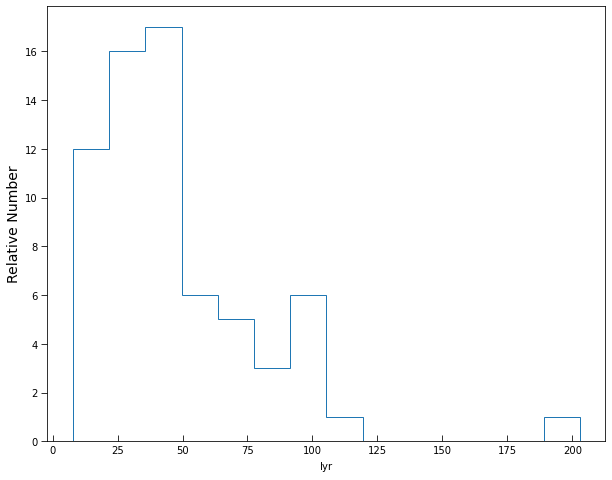

In [52]:
from astropy.visualization import quantity_support
def plot_distance_au():
 fig,axes=plt.subplots(figsize=(10,8))
 quantity_support()

 axes.tick_params(which='both', axis='x',direction='in')
 axes.tick_params(which='major',length=6)
 axes.tick_params(which='minor',length=3)
 axes.set_ylabel('Relative Number',fontsize=14)
 #axes.set_xlabel('Distance (Light-Year)',fontsize=14)
 axes.hist(distance_au,bins='auto',histtype='step')
 #plt.show()

plot_distance_au()